## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path
path = r'/Users/azadeh/Documents/CitiBike Data Quest/'

In [4]:
# Import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'citibike.csv'), index_col = False)

In [5]:
df.shape

(50000, 18)

In [6]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,NaN,0


In [7]:
df_numeric = df.drop(['trip_id', 'weekday', 'start_time', 'end_time', 'subscriber','start_station_name', 'end_station_name'], axis=1)
df_numeric.fillna(0, inplace=True)  # Replace NaN values with 0 

In [8]:
# Assuming your data is stored in a DataFrame called 'df' and you want to standardize certain columns
columns_to_standardize = ['start_hour', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'trip_duration', 'birth_year']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
df_numeric[columns_to_standardize] = scaler.fit_transform(df_numeric[columns_to_standardize])

In [9]:
# Encode categorical variables
le = LabelEncoder()
df['subscriber'] = le.fit_transform(df['subscriber'])


In [10]:
# Encode categorical variables
le = LabelEncoder()
df['weekday'] = le.fit_transform(df['weekday'])
df['subscriber'] = le.fit_transform(df['subscriber'])

# Drop non-numeric columns
df_numeric = df.drop(['trip_id', 'start_time', 'end_time', 'start_station_name', 'end_station_name'], axis=1)

# Fill missing values
df_numeric.fillna(0, inplace=True)

num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/azadeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azadeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azadeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azadeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

[-192929842792.9338,
 -88465907601.80675,
 -68748746890.39096,
 -56352233354.43303,
 -46624224207.572495,
 -40785281911.980446,
 -37484259533.15169,
 -34971148579.07399,
 -32185681097.45168]

### 2. The elbow technique

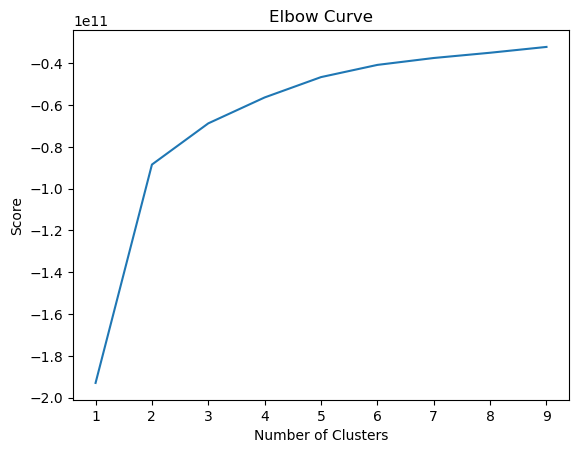

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### There's a large jump from two tofiveon the x-axis, but after that, the curve straightens out. This means that the optimal count for this clusters is five.

### 3. k-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 


## Fit the k-means object to the data.

kmeans.fit(df_numeric)

In [14]:
df_numeric['clusters'] = kmeans.fit_predict(df_numeric)

/Users/azadeh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
df_numeric.head()

,bike_id,weekday,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,clusters
0,16013,1,18,523,40.754666,-73.991382,334,40.742388,-73.997262,993,1,1968.0,2,4
1,15230,4,18,257,40.719392,-74.002472,236,40.728419,-73.987140,581,1,1983.0,1,4
2,17942,6,19,479,40.760193,-73.991255,513,40.768254,-73.988639,361,1,1989.0,1,0
3,19683,2,11,527,40.743156,-73.974347,441,40.756014,-73.967416,561,1,1988.0,2,3
4,18024,2,18,521,40.750450,-73.994811,476,40.743943,-73.979661,2296,0,0.0,0,2


In [16]:
df_numeric['clusters'].value_counts()

clusters
3    14969
0    14179
4    13873
1     3651
2     3328
Name: count, dtype: int64

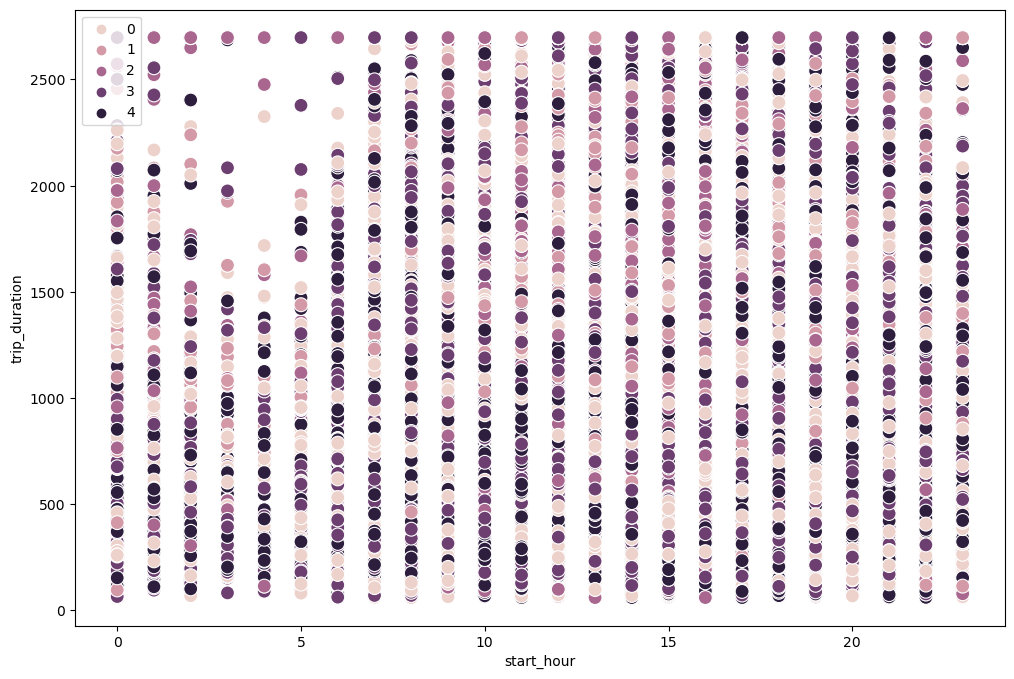

In [22]:
# Plot the clusters for the 'start_station_latitude' and 'trip_duration' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['start_hour'], y=df_numeric['trip_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('start_hour') # Label x-axis.
plt.ylabel('trip_duration') # Label y-axis.
plt.show()

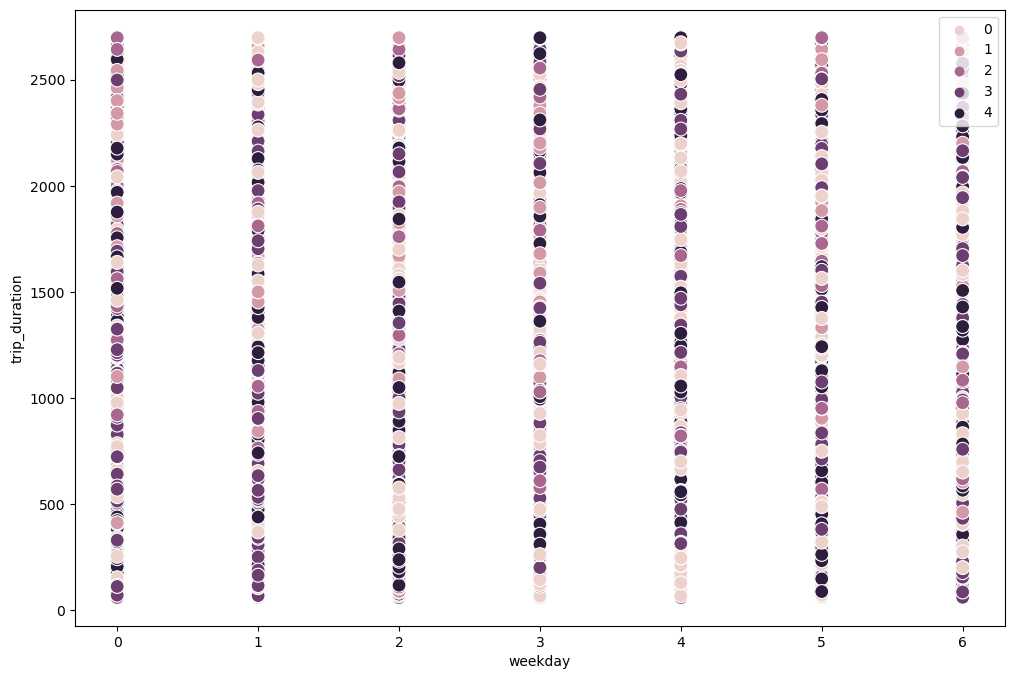

In [18]:
# Plot the clusters for the 'weekday' and 'trip_duration' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['weekday'], y=df_numeric['trip_duration'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('weekday') 
plt.ylabel('trip_duration') 
plt.show()

The clustering algorithm may not be suitable for this data. I changed the number of clusters but still the clusters are not distinct.

In [19]:
df_numeric.loc[df_numeric['clusters'] == 2, 'cluster'] = 'dark purple'
df_numeric.loc[df_numeric['clusters'] == 1, 'cluster'] = 'purple'
df_numeric.loc[df_numeric['clusters'] == 0, 'cluster'] = 'pink'

In [20]:
df_numeric.groupby('cluster').agg({'trip_duration':['mean', 'median'], 
                         'weekday':['mean', 'median'],
                          'start_station_latitude':['mean', 'median']})

trip_duration           weekday        start_station_latitude  \
                     mean  median      mean median                   mean   
cluster                                                                     
dark purple   1260.832933  1168.0  2.837440    3.0              40.732201   
pink           766.442062   617.0  3.041047    3.0              40.734731   
purple        1259.957546  1189.0  2.762257    3.0              40.732346   

                        
                median  
cluster                 
dark purple  40.732916  
pink         40.736494  
purple       40.733320

This information can help to understand behavioral profiles for each cluster, providing insights into the typical trip duration, preferred weekdays for rides, and common starting locations for users in each group.